In [0]:
# Autoreload the libraries 
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

In [0]:
# Import the libraries
from fastai import * 
from fastai.vision import * 

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()


# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=6bad94ef1dcfc7d16bca13821f72e0865a45e7202ec9894243af085fec362dc8
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 11.5 GB  | Proc size: 2.2 GB
GPU RAM Free: 11103MB | Used: 338MB | Util   3% | Total 11441MB


In [0]:
folder = 'soccer'
file = 'url_soccer.txt'

In [0]:
path = Path('data/sports')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
shutil.move("url_american_football.txt", "data/sports/")
shutil.move("url_soccer.txt", "data/sports/")

'data/sports/url_soccer.txt'

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'american_football'
file = 'url_american_football.txt'

In [0]:
path = Path('data/sports')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['soccer', 'american_football']

In [0]:
for i in classes:
    print(i)
    verify_images(path/i, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=300, num_workers=0).normalize(imagenet_stats)


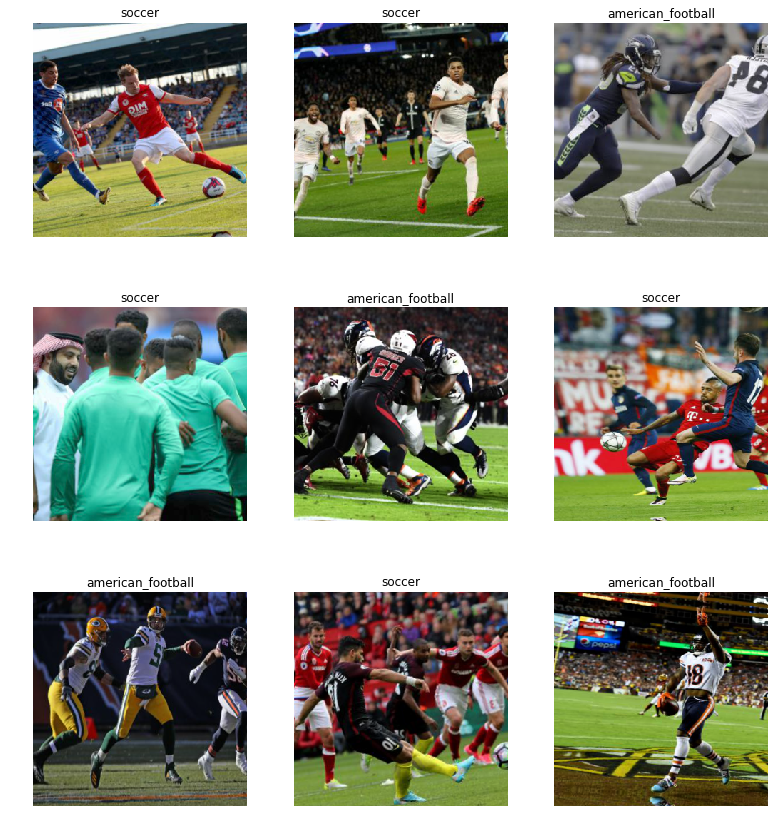

In [0]:
data.classes
data.show_batch(rows=3, figsize=(11,12))

In [0]:
data.c, len(data.train_ds), len(data.valid_ds)

(2, 149, 37)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 104430535.95it/s]


In [0]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.877868,1.147423,0.594595,00:09
1,0.690997,0.496188,0.216216,00:05
2,0.528747,0.305609,0.189189,00:05
3,0.408139,0.220602,0.081081,00:05
4,0.332350,0.195185,0.081081,00:05
5,0.283166,0.181687,0.081081,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


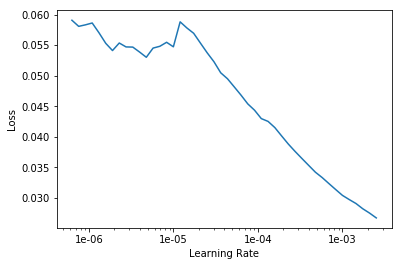

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.036732,0.229050,0.108108,00:05
1,0.047564,0.232221,0.108108,00:05


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (149 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
american_football,american_football,american_football,american_football,american_football
Path: data/sports;

Valid: LabelList (37 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
soccer,soccer,soccer,soccer,soccer
Path: data/sports;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Batch

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

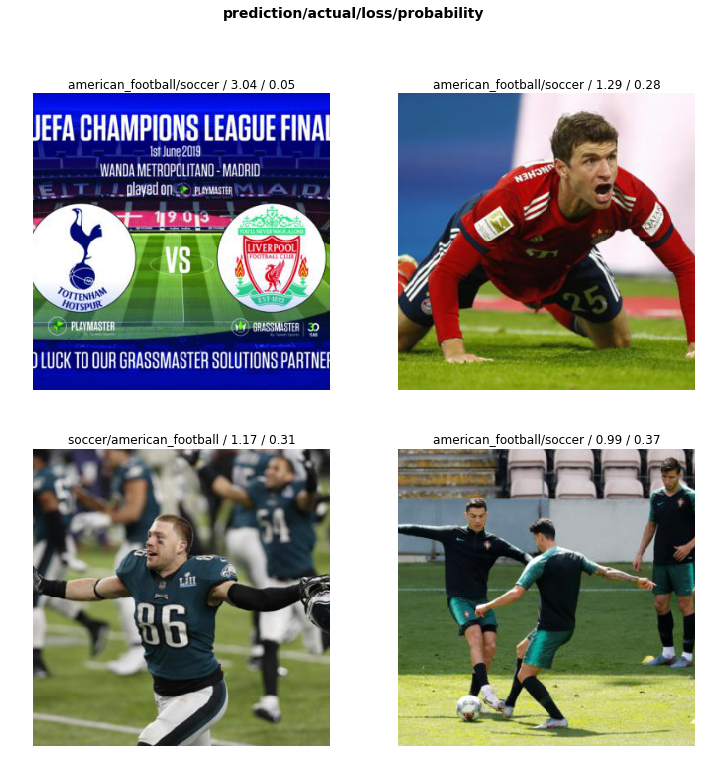

In [0]:
interp.plot_top_losses(4)

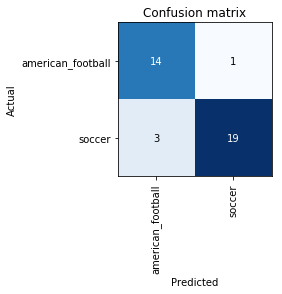

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import * 

In [0]:
# ??ImageCleaner

ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=100)

In [0]:
ImageCleaner(ds, idxs, path)